In [59]:
#Importing the necessary libraries
import nltk
import spacy
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
nlp=spacy.load('en_core_web_sm')
import re

In [38]:
text='The European authorities fined Google a record $5.1 Billion on Wednesday this week for abusing its power in the mobile phone market and ordered the company to alter its practices. Coming July, on the third week, the court hearing is scheduled at 9AM. And another meeting will be scheduled on 20th August. Let us discuss about this tomorrow morning at 10AM'
text_lis=["The European authorities fined Google a record $5.1 Billion on Wednesday this week for abusing its power in the mobile phone market and ordered the company to alter its practices.", "Coming July, on the third week, the court hearing is scheduled at 9AM. And another meeting will be scheduled on 20th August", "Let us discuss about this tomorrow morning at 10AM"]

# Part of Speech Tagging - 
Documentation to understand the Tags: https://spacy.io/usage/linguistic-features#pos-tagging

In [62]:
doc=nlp(text)
for token in nlp(text):
    print(token.text,'=>',token.dep_,'=>',token.head.text)
    print('-----------------------------------------------')

The => det => authorities
-----------------------------------------------
European => amod => authorities
-----------------------------------------------
authorities => nsubj => fined
-----------------------------------------------
fined => ROOT => fined
-----------------------------------------------
Google => dative => fined
-----------------------------------------------
a => det => record
-----------------------------------------------
record => dobj => fined
-----------------------------------------------
$ => quantmod => Billion
-----------------------------------------------
5.1 => compound => Billion
-----------------------------------------------
Billion => nummod => record
-----------------------------------------------
on => prep => record
-----------------------------------------------
Wednesday => pobj => on
-----------------------------------------------
this => det => week
-----------------------------------------------
week => npadvmod => fined
-------------------------

# Dependancy Parsing
Document for Dependancy Parsing - https://spacy.io/usage/linguistic-features#dependency-parse

In [90]:
x=' '
print(f"\033[1mText{x*27}Root of the Text{x*16}Dependency Tags{x*16}Root head of the text{x*30}\033[0m")
for chunk in doc.noun_chunks:
    print(f"{chunk.text:<30} {chunk.root.text:<30}  {chunk.root.dep_:30} {chunk.root.head.text:30}")

Text                           Root of the Text                Dependency Tags                Root head of the text                              
The European authorities       authorities                     nsubj                          fined                         
Google                         Google                          dative                         fined                         
a record                       record                          dobj                           fined                         
Wednesday                      Wednesday                       pobj                           on                            
its power                      power                           dobj                           abusing                       
the mobile phone market        market                          pobj                           in                            
the company                    company                         dobj                           ordered   

In [92]:
from spacy import displacy
displacy.render(nlp(text),jupyter=True)

# Named Entity Recognition using SpaCy
Labels: 
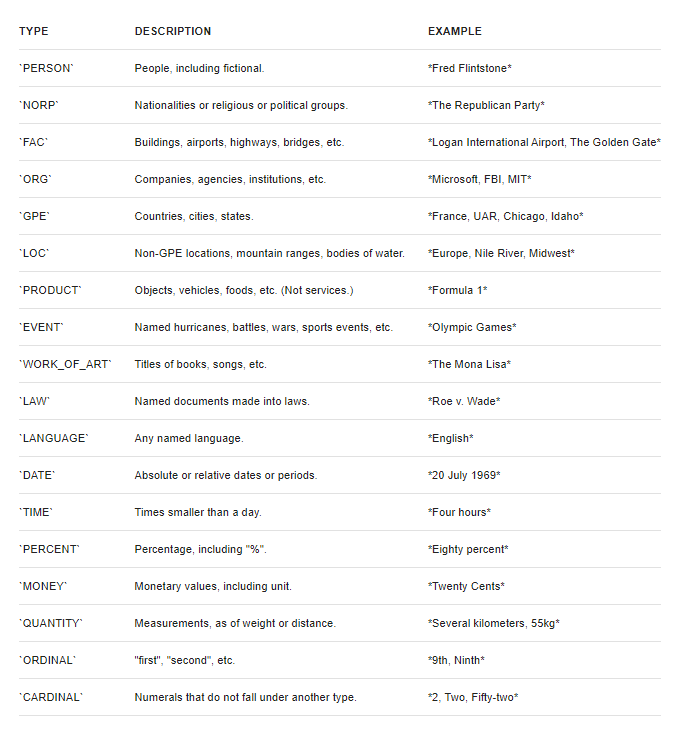

In [93]:
print(f"\033[1mText{x*22}Label{x*11}Explanation\033[0m")
for entities in doc.ents:
    print(f"{entities.text:<25} {entities.label_:<15} {spacy.explain(entities.label_)}")

Text                      Label           Explanation
European                  NORP            Nationalities or religious or political groups
$5.1 Billion              MONEY           Monetary values, including unit
Wednesday this week       DATE            Absolute or relative dates or periods
Coming July               DATE            Absolute or relative dates or periods
the third week            DATE            Absolute or relative dates or periods
9AM                       CARDINAL        Numerals that do not fall under another type
20th August               DATE            Absolute or relative dates or periods
tomorrow                  DATE            Absolute or relative dates or periods
morning                   TIME            Times smaller than a day
10AM                      CARDINAL        Numerals that do not fall under another type


# Temporal Information Extraction using Regular Expressions

In [58]:
import re

sentences = [
"European Authories are visiting the US on 17th August 2021",
"They had offered around 700 Million to procure goods this week",
"They are planning revisit on 2022."
]

months = '(January|February|March|April|May|June|July|August|September|October|November|December)'
timex = r'((%s\s+)?(\d{1,2},?\s+)?\d{4})' % months

for s in sentences:
    print (re.sub(timex, r'<TIMEX>\1</TIMEX>', s))

European Authories are visiting the US on 17th <TIMEX>August 2021</TIMEX>
They had offered around 700 Million to procure goods this week
They are planning revisit on <TIMEX>2022</TIMEX>.
